# Superstore EDA Final
By Scott Kubick kubick408060@Newmanu.edu

# Summary of the Data

**Global Superstore orders from 2012 thru 2015**

File:  **Global_Superstore_Orders_2012_2015.xlsx**

Tab 1, **Orders**
21591 Rows

Tab 2,  **People**
24 Rows

# Data Dictionary
**Fields in Global_Superstore_Orders_2012_2015.xlsx**









Fields in Global_Superstore_Orders_2012_2015.xlsx

Tab 1, Orders

*   Row ID

*   Order Id

*   Order Date

*   Ship Date

*   Ship Mode

*   Customer ID

*   Customer Name

*   Segment

*   Postal Code

*   City

*   State

*   Country

*   Region

*   Market

*   Product Id

*   Category

*   Sub-Category

*   Product Name

*   Sales

*   Quantity

*   Discount

*   Profit

*   Shipping Cost

*   Order

*   Priority

Tab 2, People

*   Person

*   Region

Import Libraries and Set Notebook Defaults.  Then Connect to Google Drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Display all dataframes Columns
pd.set_option('display.max_columns', None)

#Set the Desired Formatting string(e.g., Display 2 decimal places)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Superstore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx')

#Read Review, and Prep Data

In [ ]:
#Review top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [ ]:
#Review bottom 5 rows
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium


In [ ]:
#Review 10 rows of data
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
42289,43000,EG-2015-CL270038-42228,2015-08-12,2015-08-18,Standard Class,CL-270038,Craig Leslie,Home Office,NaN,Hurghada,Al Bahr Al Ahmar,Egypt,North Africa,Africa,TEC-CO-4779,Technology,Copiers,"HP Ink, High-Speed",126.90,1,0.00,7.59,10.39,Medium
11520,21325,IN-2013-CY1274559-41404,2013-05-10,2013-05-14,Standard Class,CY-1274559,Craig Yedwab,Corporate,NaN,Semarang,Jawa Tengah,Indonesia,Southeastern Asia,Asia Pacific,FUR-CH-4531,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",691.47,2,0.27,28.41,51.54,Medium
33404,26320,ID-2014-ED1388559-41997,2014-12-24,2014-12-28,Standard Class,ED-1388559,Emily Ducich,Home Office,NaN,Jakarta,Jakarta,Indonesia,Southeastern Asia,Asia Pacific,OFF-SU-4974,Office Supplies,Supplies,"Kleencut Box Cutter, High Speed",36.73,2,0.47,-15.95,1.93,High
35484,33806,CA-2015-MY17380140-42066,2015-03-03,2015-03-09,Standard Class,MY-173801404,Maribeth Yedwab,Corporate,"90,045.00",Los Angeles,California,United States,Western US,USCA,TEC-AC-5104,Technology,Accessories,Logitech G13 Programmable Gameboard with LCD D...,479.94,6,0.00,52.79,31.29,Medium
11719,3037,MX-2013-PB1915082-41410,2013-05-16,2013-05-16,Same Day,PB-1915082,Philip Brown,Consumer,NaN,Temixco,Morelos,Mexico,Central America,LATAM,OFF-SU-4984,Office Supplies,Supplies,"Kleencut Ruler, Steel",25.92,3,0.00,8.76,3.11,High
20442,45023,CA-2014-DM295523-41661,2014-01-22,2014-01-28,Standard Class,DM-295523,Dario Medina,Corporate,NaN,Mississauga,Ontario,Canada,Canada,USCA,OFF-BI-3726,Office Supplies,Binders,"Cardinal Binding Machine, Economy",49.77,1,0.00,13.92,2.65,Medium
44132,33259,CA-2015-RW19690140-42258,2015-09-11,2015-09-16,Second Class,RW-196901402,Robert Waldorf,Consumer,"65,807.00",Springfield,Missouri,United States,Central US,USCA,OFF-BI-5333,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,13.71,3,0.00,6.58,1.36,Medium
21486,40108,US-2014-SP20650140-41707,2014-03-09,2014-03-14,Standard Class,SP-206501402,Stephanie Phelps,Corporate,"49,201.00",Jackson,Michigan,United States,Central US,USCA,OFF-AP-4714,Office Supplies,Appliances,Honeywell Enviracaire Portable Air Cleaner for...,207.14,3,0.10,48.33,12.15,High
268,32421,US-2012-HL15040140-40929,2012-01-21,2012-01-27,Standard Class,HL-150401408,Hunter Lopez,Consumer,"72,401.00",Jonesboro,Arkansas,United States,Southern US,USCA,OFF-AR-5305,Office Supplies,Art,Newell 327,6.63,3,0.00,1.79,1.47,Medium
45731,2616,MX-2015-RD19585143-42284,2015-10-07,2015-10-11,Standard Class,RD-19585143,Rob Dowd,Consumer,NaN,Maracaibo,Zulia,Venezuela,South America,LATAM,OFF-EN-5040,Office Supplies,Envelopes,"Kraft Manila Envelope, with clear poly window",24.02,2,0.40,3.18,2.12,Medium


In [ ]:
#get the count of each tab
df.shape

(51290, 24)

In [ ]:
#Review the data type of each item
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
#Review each data type
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,632,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,na,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,41296,915,2001,9994,5883,14302,227,31289,6146,227,29433


In this section I reviewed the data to determine how to merge the two tabs and clean the data

# Merget the two tabs in the spreadsheet

In [ ]:
#Merging tab 1 and tab 2 in file Global_Superstore_Orders_2012_2015.xlsx on Region
df1 = pd.read_excel('/content/drive/MyDrive/Superstore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name='People')

In [ ]:
df = df1.merge(df, how = 'left', on = 'Region')

#Cleaning Steps

Setting Data Types


In [ ]:
#Review the data types as one sheet
df.dtypes

,0
Person,object
Region,object
Row ID,float64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object


In [ ]:
#Display all dataframe columns
pd.set_option('display.max_columns', None)

In [ ]:
#Reviewing the data types to know what to clean
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,"50,906.00",50906,50906,"9,994.00","50,906.00","50,906.00","50,906.00","50,906.00","50,906.00"
mean,"25,488.29",2014-05-12 00:07:04.311475968,2014-05-15 23:26:08.396652800,"55,190.38",247.04,3.49,0.14,28.48,26.53
min,1.00,2012-01-01 00:00:00,2012-01-03 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98",1.00
25%,"12,727.25",2013-06-19 00:00:00,2013-06-23 00:00:00,"23,223.00",30.84,2.00,0.00,0.00,2.62
50%,"25,453.50",2014-07-08 00:00:00,2014-07-12 00:00:00,"56,430.50",85.16,3.00,0.00,9.20,7.80
75%,"38,179.75",2015-05-22 00:00:00,2015-05-26 00:00:00,"90,008.00",251.63,5.00,0.20,36.82,24.54
max,"51,290.00",2015-12-31 00:00:00,2016-01-07 00:00:00,"99,301.00","22,638.48",14.00,0.85,"8,399.98",933.57
std,"14,748.42",NaN,NaN,"32,063.69",488.51,2.28,0.21,174.70,57.34


In [ ]:
#Reviewing the data types to know what to clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50908 entries, 0 to 50907
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Person          50908 non-null  object        
 1   Region          50908 non-null  object        
 2   Row ID          50906 non-null  float64       
 3   Order ID        50906 non-null  object        
 4   Order Date      50906 non-null  datetime64[ns]
 5   Ship Date       50906 non-null  datetime64[ns]
 6   Ship Mode       50906 non-null  object        
 7   Customer ID     50906 non-null  object        
 8   Customer Name   50906 non-null  object        
 9   Segment         50906 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  City            50906 non-null  object        
 12  State           50906 non-null  object        
 13  Country         50906 non-null  object        
 14  Market          50906 non-null  object        
 15  Pr

In [ ]:
#Reviewing the top 10 rows
df.head()

,Person,Region,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Marilène Rousseau,Caribbean,130.00,MX-2012-BT1130531-40912,2012-01-04,2012-01-11,Standard Class,BT-1130531,Beth Thompson,Home Office,NaN,Manzanillo,Granma,Cuba,LATAM,OFF-EN-4912,Office Supplies,Envelopes,"Jiffy Interoffice Envelope, Set of 50",185.76,6.00,0.00,3.60,16.39,Medium
1,Marilène Rousseau,Caribbean,"9,066.00",MX-2012-AW1093031-40912,2012-01-04,2012-01-08,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,LATAM,FUR-CH-5757,Furniture,Chairs,"SAFCO Chairmat, Black",38.26,1.00,0.00,6.88,4.25,Medium
2,Marilène Rousseau,Caribbean,"9,065.00",MX-2012-AW1093031-40912,2012-01-04,2012-01-08,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,LATAM,TEC-AC-5219,Technology,Accessories,"Memorex Mouse, USB",37.84,2.00,0.00,2.24,3.94,Medium
3,Marilène Rousseau,Caribbean,"9,067.00",MX-2012-AW1093031-40912,2012-01-04,2012-01-08,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,LATAM,OFF-EN-5041,Office Supplies,Envelopes,"Kraft Peel and Seal, Recycled",38.58,3.00,0.00,7.68,3.51,Medium
4,Marilène Rousseau,Caribbean,"9,372.00",MX-2012-RB1979536-40923,2012-01-15,2012-01-17,First Class,RB-1979536,Ross Baird,Home Office,NaN,La Romana,La Romana,Dominican Republic,LATAM,FUR-CH-4704,Furniture,Chairs,"Hon Swivel Stool, Set of Two",265.44,3.00,0.20,23.22,43.55,Medium


In [ ]:
#New Optimized read from Excel fixed Zip code using the coding from lession 2.6
path = '/content/drive/MyDrive/Superstore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx'
df = pd.read_excel(path, dtype={'Postal Code': str})
df['Postal Code'] = df['Postal Code'].str.zfill(5).fillna('na')

columns = ['Country', 'State', 'City', 'Postal Code']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [ ]:
#Shipping cost should just have 2 decimals
df['Shipping Cost'] = df['Shipping Cost'].round(2)

In [ ]:
#Sales should just have 2 decimals
df['Sales'] = df['Sales'].round(2)

In [ ]:
#Sales should just have 2 decimals
df['Profit'] = df['Profit'].round(2)

In [ ]:
df.shape

(51290, 24)

In [ ]:
#Reviewing the data types to know what to clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In the section I cleaned the data

# Data Visualition Part 1

<Axes: xlabel='Sales', ylabel='Count'>

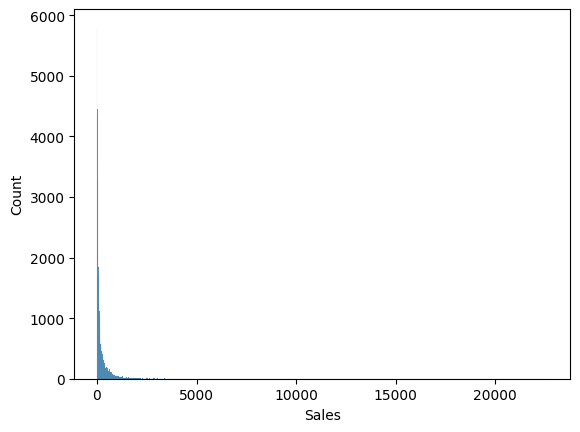

In [ ]:
sns.histplot(df['Sales'])

<Axes: xlabel='Sales', ylabel='Count'>

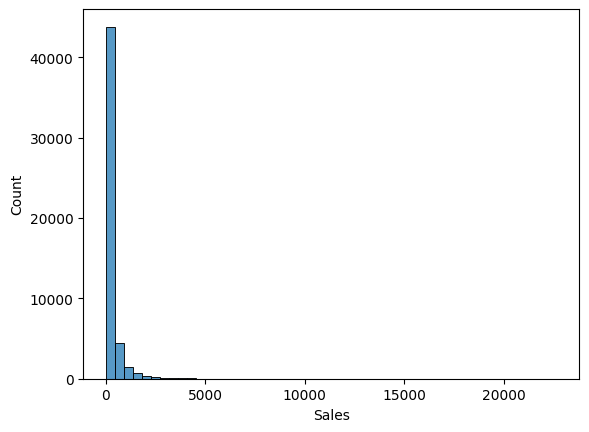

In [ ]:
sns.histplot(df['Sales'], bins=50)

For the Sales they are making a small profit but have high volumn.  In some cases large profit is made on few sales.

<Axes: xlabel='Sales'>

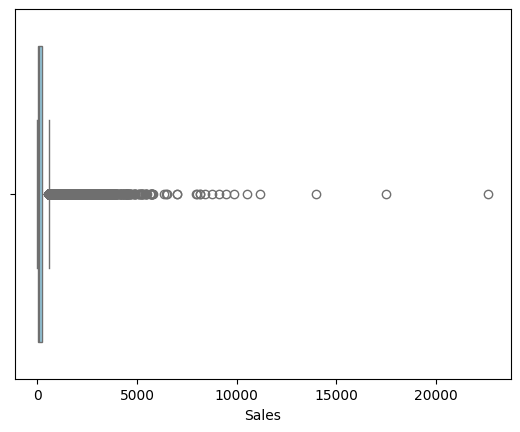

In [ ]:
sns.boxplot(x=df['Sales'], color='skyblue')

The box plot show that sales have a low central tendenancy, but does have
a many outliners.

<Axes: xlabel='Quantity', ylabel='Count'>

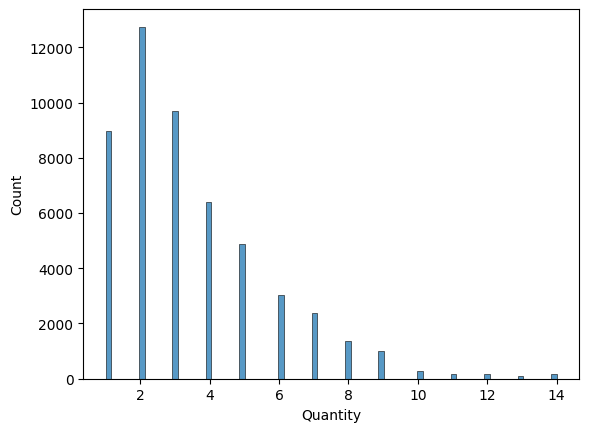

In [ ]:
sns.histplot(df['Quantity'])

<Axes: xlabel='Quantity', ylabel='Count'>

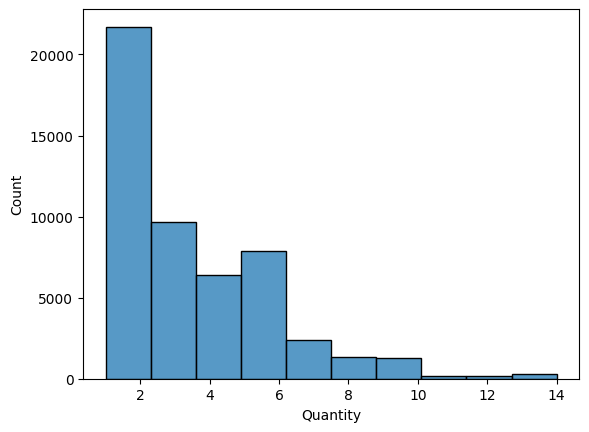

In [ ]:
sns.histplot(df['Quantity'], bins=10)

Most purchases are in 1 to 2 quantity.  Perhaps more discounts should be applied to intice higher quantity purchases

<Axes: xlabel='Quantity'>

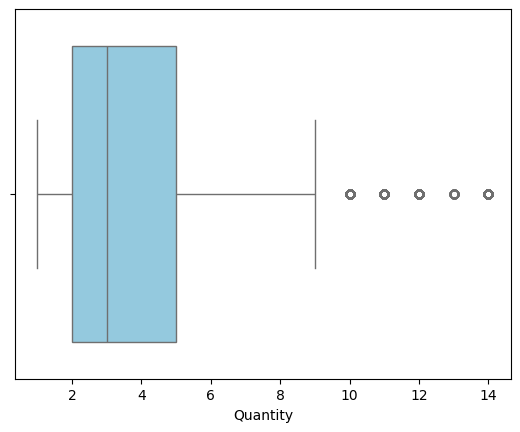

In [ ]:
sns.boxplot(x=df['Quantity'], color='skyblue')

The quantity is tightly grouped and all but a few outlines fall between the 25th and 75th percentiles.  Meaning quanity of sales is tighly clustered aournd 2 to 5 range.

<Axes: xlabel='Discount', ylabel='Count'>

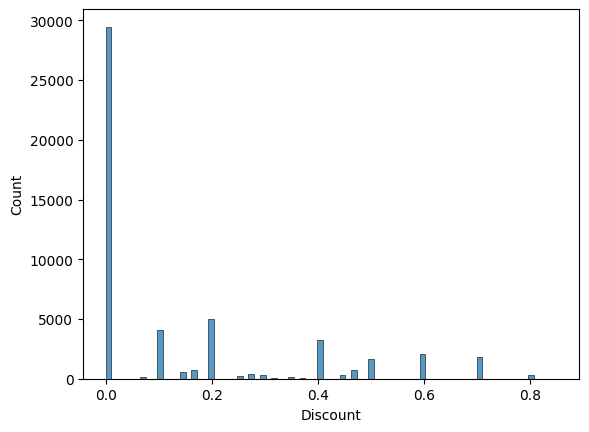

In [ ]:
sns.histplot(df['Discount'])

<Axes: xlabel='Discount', ylabel='Count'>

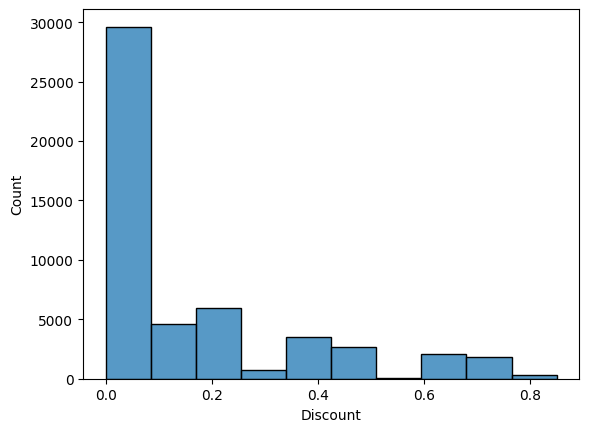

In [ ]:
sns.histplot(df['Discount'], bins=10)

The discount is mainly used at low volumes which does not help larger quanity of orders.

<Axes: xlabel='Discount'>

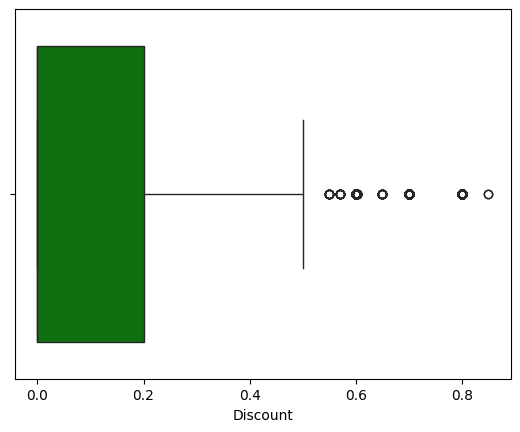

In [ ]:
sns.boxplot(x=df['Discount'], color='green')

For the discount the large majority is between 0 to .2%. Very few purchases are taking advantage of the larger discounts.  

<Axes: xlabel='Profit', ylabel='Count'>

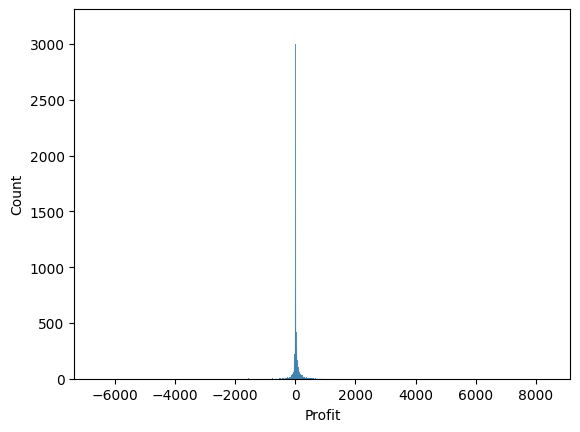

In [ ]:
sns.histplot(df['Profit'])

<Axes: xlabel='Profit', ylabel='Count'>

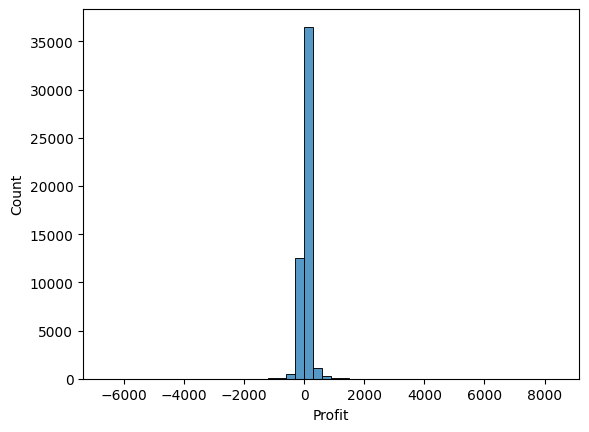

In [ ]:
sns.histplot(df['Profit'], bins=50)

Profit does not appear to be high enough to be sustainable.  Need to remove discount from small orders and give discount for larger orders.

<Axes: xlabel='Profit'>

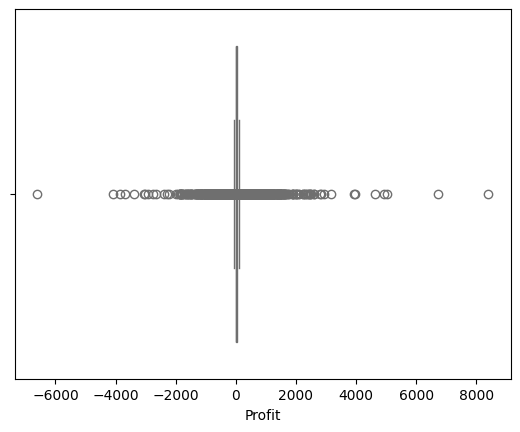

In [ ]:
sns.boxplot(x=df['Profit'], color='skyblue')

Profit is tightly clusted around 0, it seems that the profit and loss seem evenly distributed, not sure how this company is staying in business.

<Axes: xlabel='Shipping Cost', ylabel='Count'>

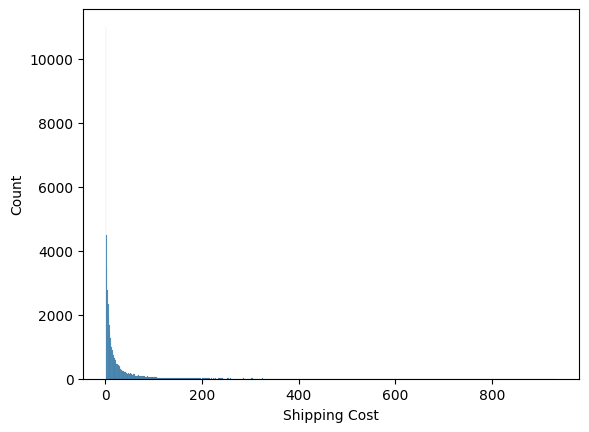

In [ ]:
sns.histplot(df['Shipping Cost'])

<Axes: xlabel='Shipping Cost', ylabel='Count'>

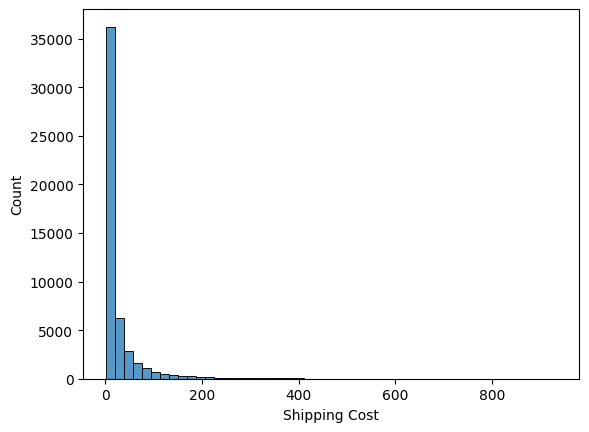

In [ ]:
sns.histplot(df['Shipping Cost'], bins=50)

Shipping cost seem correct and low for smaller orders and higher for larger quantity orders.  

<Axes: xlabel='Shipping Cost'>

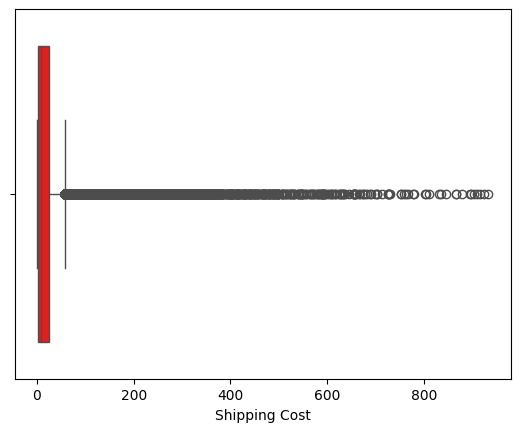

In [ ]:
sns.boxplot(x=df['Shipping Cost'], color='red')

Shipping costs are tighly clustered due to small sales and are in the 25 to 50 percentil.  However, there are lots of outlines due to larger sales orders.

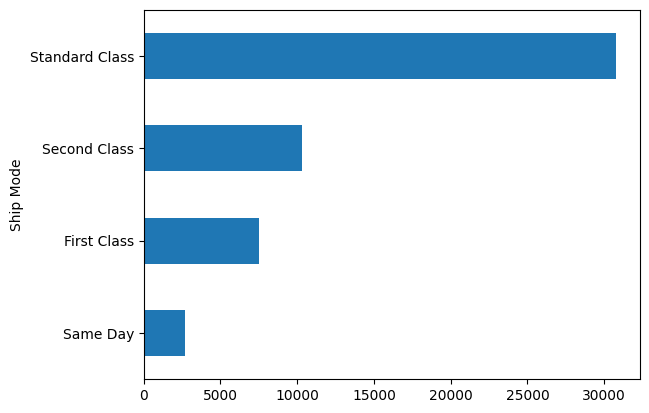

In [ ]:
data = df['Ship Mode'].value_counts(ascending=True)
data.plot.barh();

In [ ]:
data = df['Ship Mode'].value_counts(ascending=True)
data

,count
Ship Mode,
Same Day,2701
First Class,7505
Second Class,10309
Standard Class,30775


In [ ]:
data = df['Ship Mode'].value_counts(normalize=True)
data

,proportion
Ship Mode,
Standard Class,0.60
Second Class,0.20
First Class,0.15
Same Day,0.05


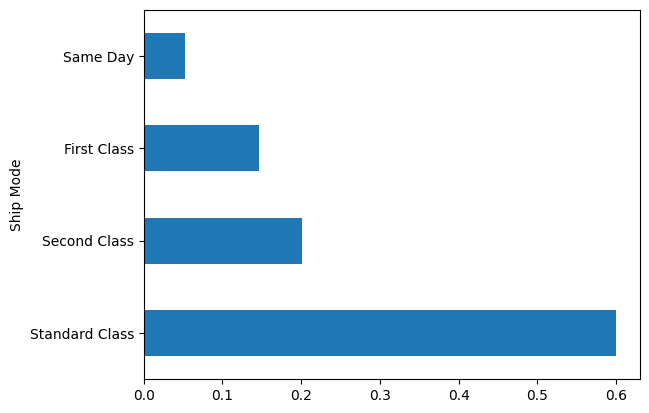

In [ ]:
data = df['Ship Mode'].value_counts(normalize=True)
data.plot.barh();

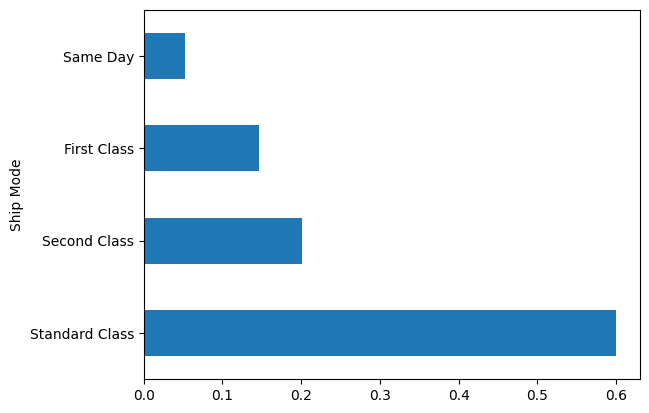

In [ ]:
data = df['Ship Mode'].value_counts(normalize=True)
data.plot.barh();

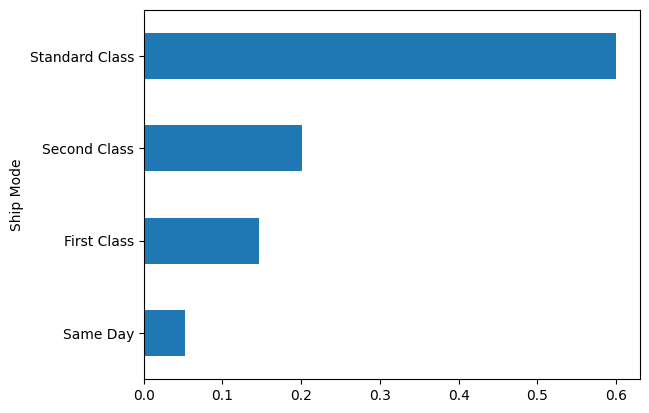

In [ ]:
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data.plot.barh();

Majority of all orders are using standard class.  However, all options are being used at a steady decline for faster shipping with increased cost.

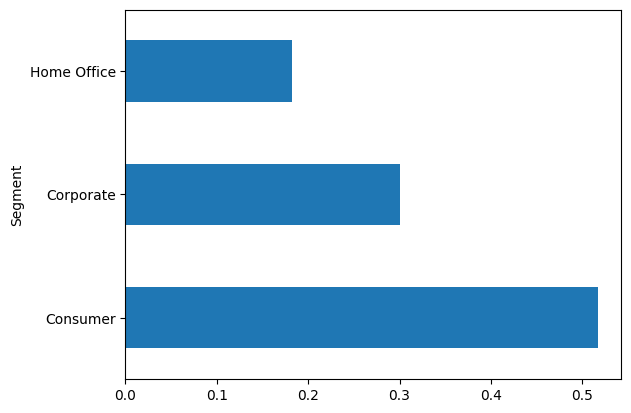

In [ ]:
data = df['Segment'].value_counts(normalize=True)
data.plot.barh();

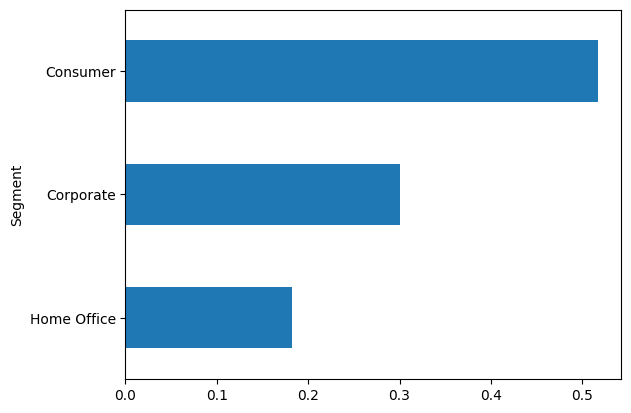

In [ ]:
data = df['Segment'].value_counts(ascending=True, normalize=True)
data.plot.barh();

over 50% of the sales are from individual consumers, 30% are from corporations, and less then 20% of sales are from home offices.

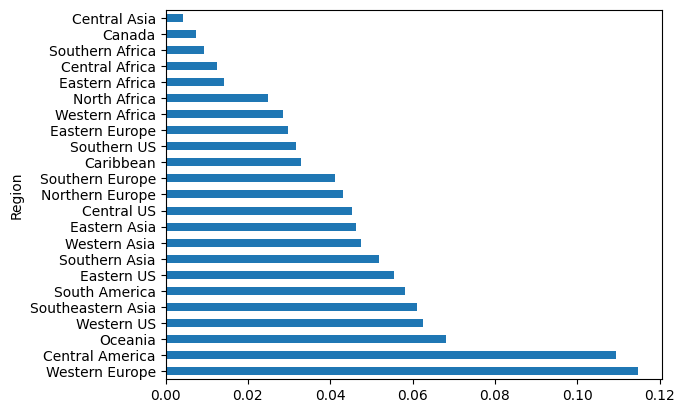

In [ ]:
data = df['Region'].value_counts(normalize=True)
data.plot.barh();

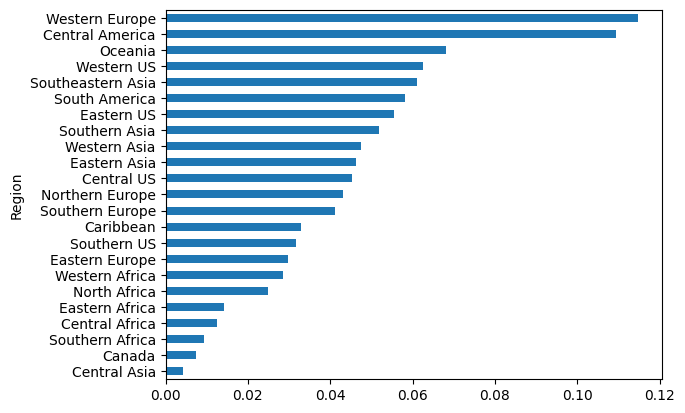

In [ ]:
data = df['Region'].value_counts(ascending=True, normalize=True)
data.plot.barh();

The above chart displays the countries with the highest percentages of sales.  Europe and America have the regions with the highest volumn of sales.

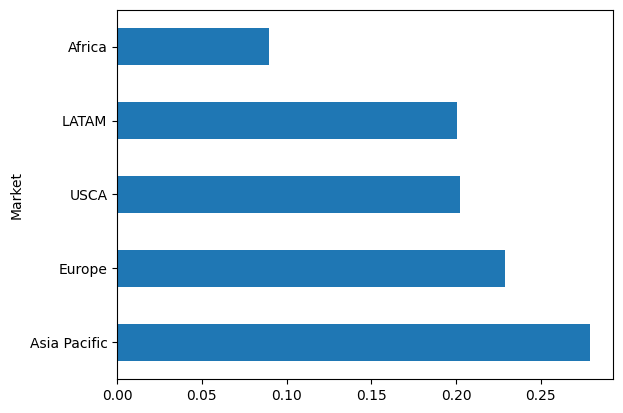

In [ ]:
data = df['Market'].value_counts(normalize=True)
data.plot.barh();

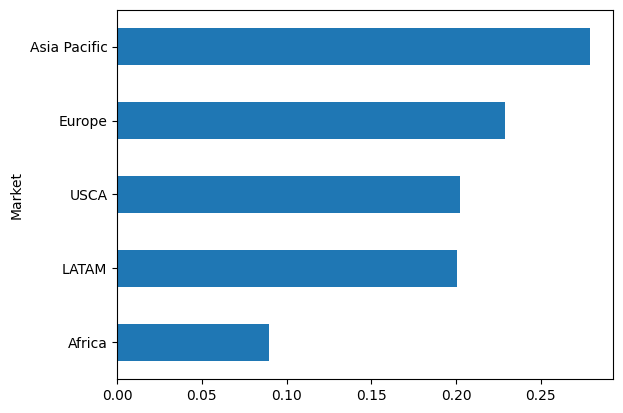

In [ ]:
data = df['Market'].value_counts(ascending=True, normalize=True)
data.plot.barh();

When the regions are grouped more tightly, it shows a different picture with the Asia Pacific having the larges market share.

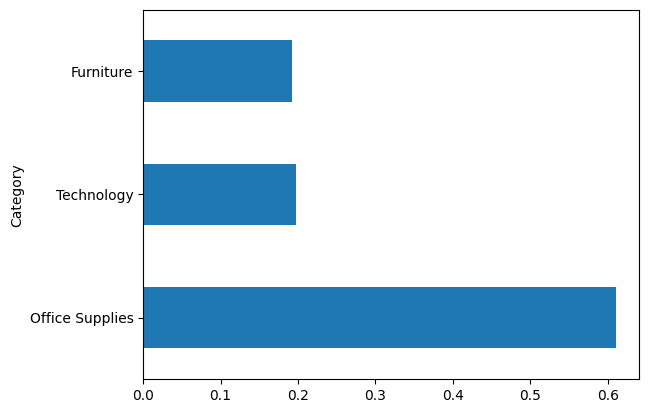

In [ ]:
data = df['Category'].value_counts(normalize=True)
data.plot.barh();

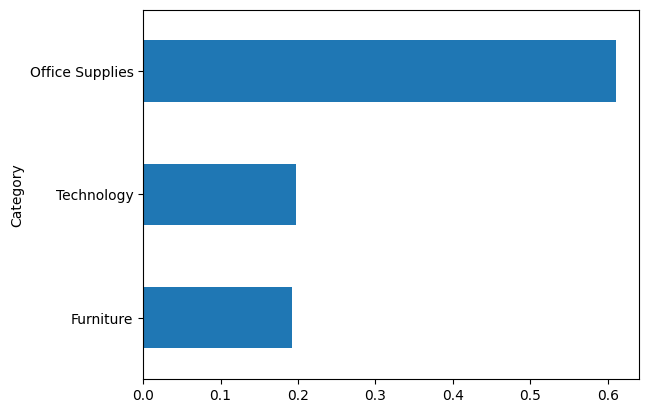

In [ ]:
data = df['Category'].value_counts(ascending=True, normalize=True)
data.plot.barh();

The chart above is displaying this company is selling a majority of office supplies as the main category of sales making up over 60% of volume.

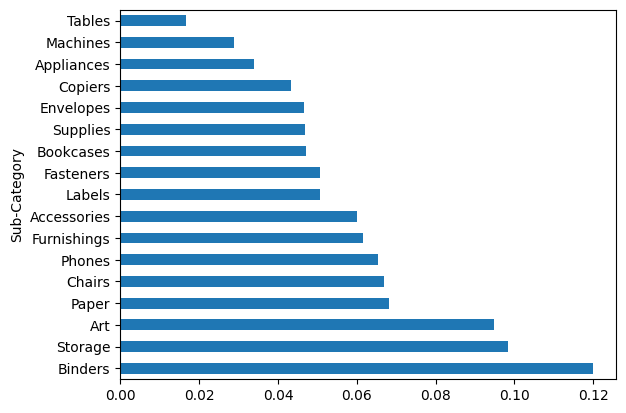

In [ ]:
data = df['Sub-Category'].value_counts(normalize=True)
data.plot.barh();

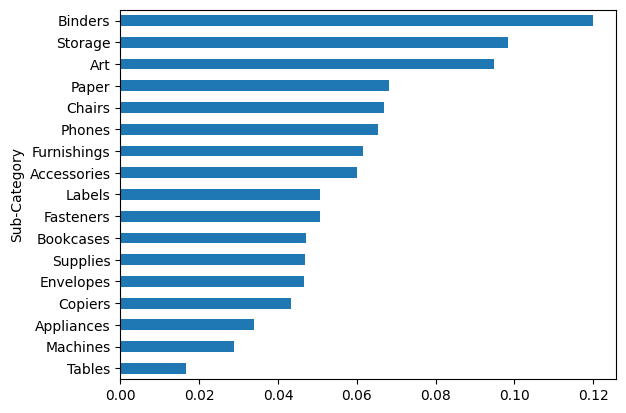

In [ ]:
data = df['Sub-Category'].value_counts(ascending=True, normalize=True)
data.plot.barh();

When breaking the data down to a smaller sub-Category it is clear that the products sold make up a large majority of office supplies.  Binders, Storage, and Art making up over 30% of sales.  Perhaps more discounts should be applied to slower moving items.

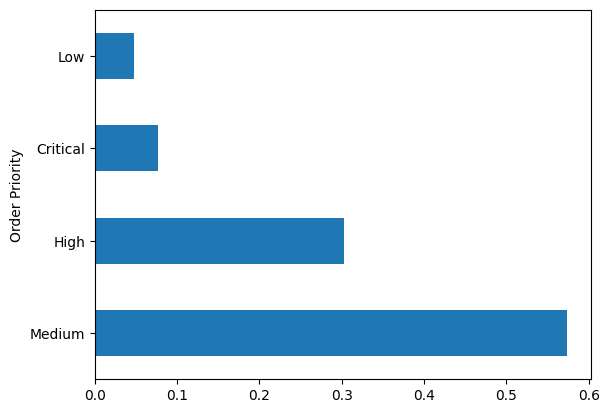

In [ ]:
data = df['Order Priority'].value_counts(normalize=True)
data.plot.barh();

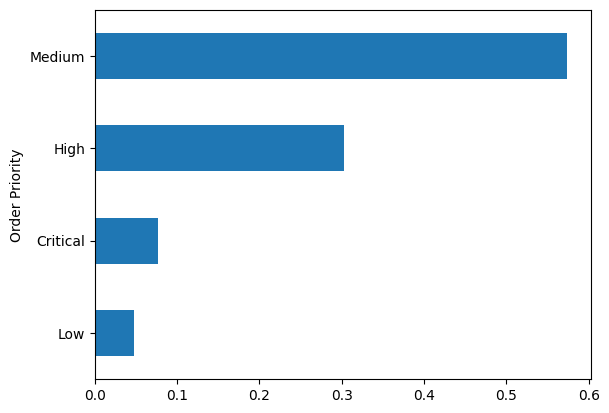

In [ ]:
data = df['Order Priority'].value_counts(ascending=True, normalize=True)
data.plot.barh();

It is interesting that the majority of orders are considered medium priority.  I am thinking this company is considering almost 90% of their orders medium to high priority.  This could cause too many knee jerk reactions to working overtime or paying expediate fees.  If I was in management, I would redefine this metric.  


# Data Visualition Part 2 - Categorical + Numeric Fields

In [ ]:
# Segment
df['Segment'].value_counts()

,count
Segment,
Consumer,26518
Corporate,15429
Home Office,9343


In [ ]:
#Sales
df['Sales'].describe()

,Sales
count,"51,290.00"
mean,246.49
std,487.57
min,0.44
25%,30.76
50%,85.06
75%,251.06
max,"22,638.48"


In [ ]:
#Total Sales by Segment
df.groupby('Segment')['Sales'].sum()

,Sales
Segment,
Consumer,"6,507,949.43"
Corporate,"3,824,697.55"
Home Office,"2,309,855.07"


Segment
Consumer      6,507,949.43
Corporate     3,824,697.55
Home Office   2,309,855.07
Name: Sales, dtype: float64


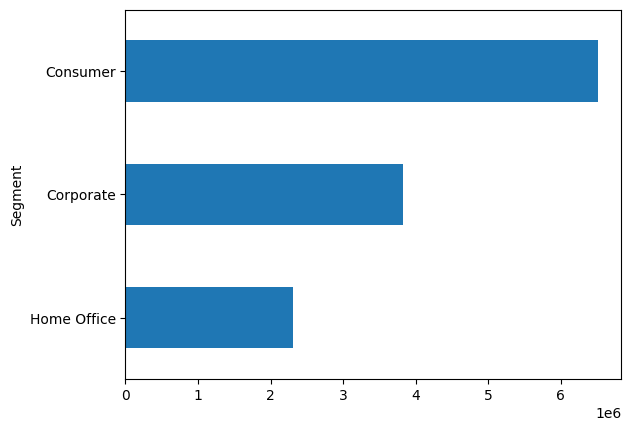

In [ ]:
#Total Sales by Segment Bar Chart
rawdata = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(rawdata)
data = df.groupby('Segment')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
# Region Value Counts
df['Region'].value_counts()

,count
Region,
Western Europe,5883
Central America,5616
Oceania,3487
Western US,3203
Southeastern Asia,3129
South America,2988
Eastern US,2848
Southern Asia,2655
Western Asia,2440


In [ ]:
#Region describe
df['Region'].describe()

,Region
count,51290
unique,23
top,Western Europe
freq,5883


In [ ]:
#Total Sales by Region
df.groupby('Region')['Sales'].sum()

,Sales
Region,
Canada,"66,928.17"
Caribbean,"324,280.88"
Central Africa,"143,630.01"
Central America,"1,223,100.79"
Central Asia,"19,311.48"
Central US,"501,239.76"
Eastern Africa,"127,856.05"
Eastern Asia,"855,059.37"
Eastern Europe,"310,033.44"


Region
Western Europe      1,731,929.70
Central America     1,223,100.79
Oceania             1,100,184.44
Southeastern Asia     884,423.35
Southern Asia         866,572.71
Eastern Asia          855,059.37
Western US            725,457.80
Eastern US            678,781.31
Northern Europe       636,779.16
South America         617,223.64
Southern Europe       608,593.98
Central US            501,239.76
Southern US           391,721.87
Caribbean             324,280.88
Western Asia          317,106.94
Eastern Europe        310,033.44
North Africa          233,216.61
Western Africa        173,878.83
Central Africa        143,630.01
Eastern Africa        127,856.05
Southern Africa       105,191.76
Canada                 66,928.17
Central Asia           19,311.48
Name: Sales, dtype: float64


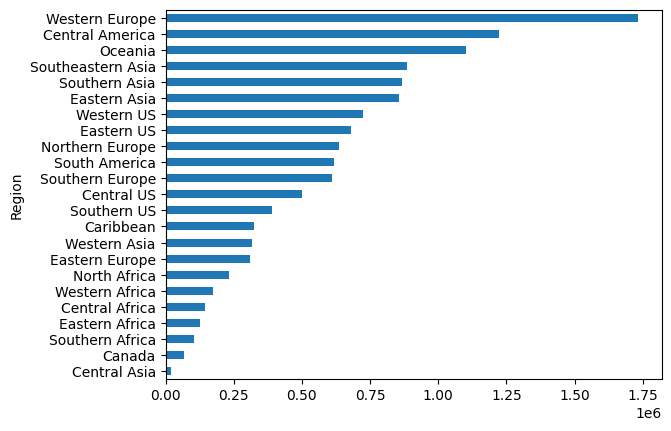

In [ ]:
#Total Sales by Region Bar Chart
rawdata = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(rawdata)
data = df.groupby('Region')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
# Market Value Counts
df['Market'].value_counts()

,count
Market,
Asia Pacific,14302
Europe,11729
USCA,10378
LATAM,10294
Africa,4587


In [ ]:
#Market describe
df['Market'].describe()

,Market
count,51290
unique,5
top,Asia Pacific
freq,14302


In [ ]:
#Total Sales by Market
df.groupby('Market')['Sales'].sum()

,Sales
Market,
Africa,"783,773.26"
Asia Pacific,"4,042,658.29"
Europe,"3,287,336.28"
LATAM,"2,164,605.31"
USCA,"2,364,128.91"


Market
Asia Pacific   4,042,658.29
Europe         3,287,336.28
USCA           2,364,128.91
LATAM          2,164,605.31
Africa           783,773.26
Name: Sales, dtype: float64


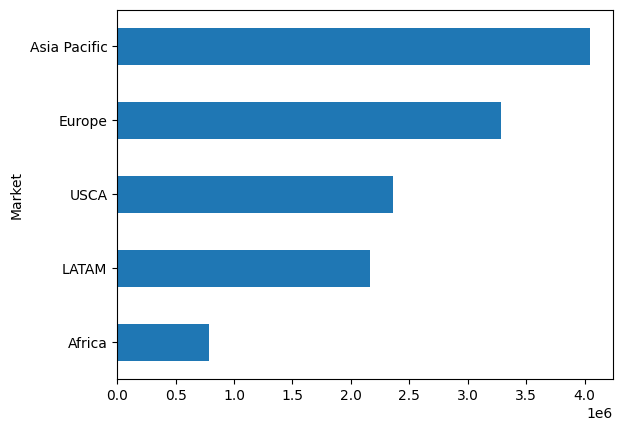

In [ ]:
#Total Sales by Market Bar Chart
rawdata = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
print(rawdata)
data = df.groupby('Market')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
# Category Value Counts
df['Category'].value_counts()

,count
Category,
Office Supplies,31289
Technology,10141
Furniture,9860


In [ ]:
#Category describe
df['Category'].describe()

,Category
count,51290
unique,3
top,Office Supplies
freq,31289


In [ ]:
#Total Sales by Category
df.groupby('Category')['Sales'].sum()

,Sales
Category,
Furniture,"4,110,451.81"
Office Supplies,"3,787,492.58"
Technology,"4,744,557.66"


Category
Technology        4,744,557.66
Furniture         4,110,451.81
Office Supplies   3,787,492.58
Name: Sales, dtype: float64


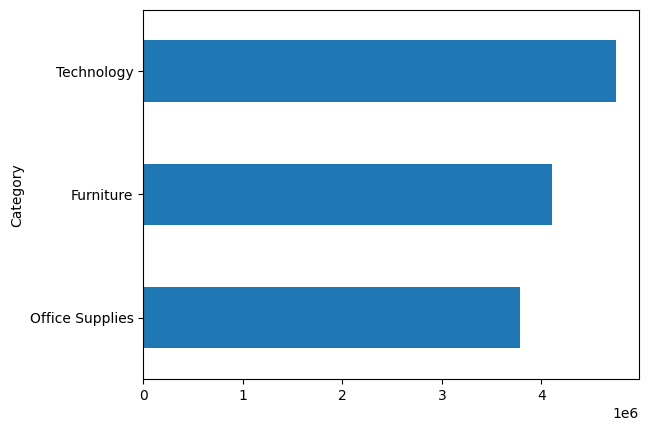

In [ ]:
#Total Sales by Category Bar Chart
rawdata = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(rawdata)
data = df.groupby('Category')['Sales'].sum().sort_values()
data.plot.barh();

In [ ]:
# Sub-Category Value Counts
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,6146
Storage,5049
Art,4864
Paper,3492
Chairs,3434
Phones,3357
Furnishings,3154
Accessories,3075
Labels,2601


In [ ]:
#Sub-Category describe
df['Sub-Category'].describe()

,Sub-Category
count,51290
unique,17
top,Binders
freq,6146


In [ ]:
#Total Sales by Sub-Category
df.groupby('Sub-Category')['Sales'].sum()

,Sales
Sub-Category,
Accessories,"749,237.02"
Appliances,"1,010,535.57"
Art,"371,613.25"
Binders,"461,869.58"
Bookcases,"1,466,572.11"
Chairs,"1,501,681.85"
Copiers,"1,509,436.31"
Envelopes,"169,217.35"
Fasteners,"89,494.98"


Sub-Category
Phones        1,706,824.19
Copiers       1,509,436.31
Chairs        1,501,681.85
Bookcases     1,466,572.11
Storage       1,126,812.98
Appliances    1,010,535.57
Machines        779,060.14
Tables          757,041.89
Accessories     749,237.02
Binders         461,869.58
Furnishings     385,155.96
Art             371,613.25
Supplies        242,811.03
Paper           241,787.52
Envelopes       169,217.35
Fasteners        89,494.98
Labels           73,350.32
Name: Sales, dtype: float64


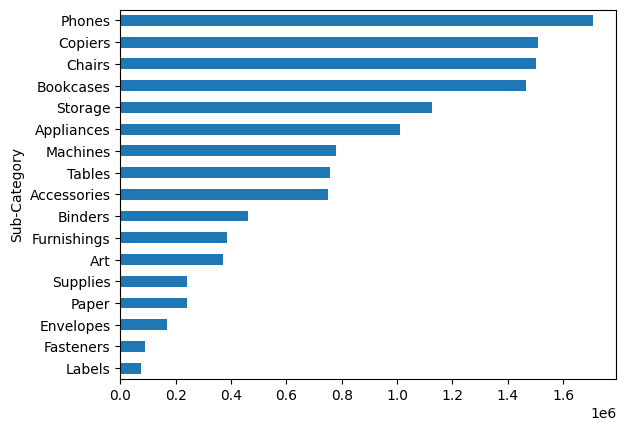

In [ ]:
#Total Sales by Sub-Category Bar Chart
rawdata = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(rawdata)
data = df.groupby('Sub-Category')['Sales'].sum().sort_values()
data.plot.barh();

# Data Visualition Part 3 - Time Series (Dates)

In [ ]:
#Group sales data by Year and Month
#Creates a new dataframe: Monthly_Sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2012-01,"98,898.50"
1,2012-02,"103,717.95"
2,2012-03,"135,746.46"
3,2012-04,"114,332.96"
4,2012-05,"158,228.30"


In [ ]:
monthly_sales

,Order Date,Sales
0,2012-01,"98,898.50"
1,2012-02,"103,717.95"
2,2012-03,"135,746.46"
3,2012-04,"114,332.96"
4,2012-05,"158,228.30"
5,2012-06,"207,571.48"
6,2012-07,"118,434.81"
7,2012-08,"208,063.25"
8,2012-09,"284,587.74"
9,2012-10,"216,114.55"


In [ ]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  48 non-null     period[M]
 1   Sales       48 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 900.0 bytes


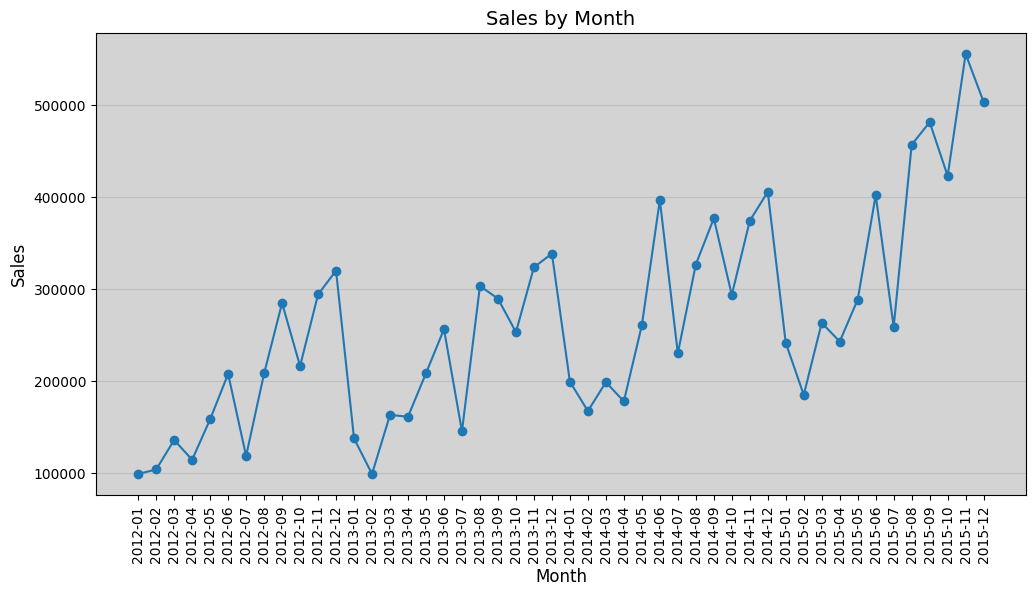

In [ ]:
#Convert to string for plotting
monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)

#Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='-')

#Formatting the plot
plt.title('Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=90)

ax = plt.gca()  # Get the current Axes
ax.set_facecolor('lightgrey')  # Change plot (axes) background color
plt.grid(axis='y', linestyle='-', alpha=0.6)


#Show the plot
plt.show()




In [ ]:
#Create a sales by quarter dataframe
#Group sales data by Year and quarter
#Creates a new dataframe: quarterly_sales
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()
#Convert to string for plotting
quarterly_sales['Order Date'] = quarterly_sales['Order Date'].dt.strftime('%Y-Q%q')
quarterly_sales.head(10)





,Order Date,Sales
0,2012-Q1,"338,362.91"
1,2012-Q2,"480,132.74"
2,2012-Q3,"611,085.80"
3,2012-Q4,"829,869.36"
4,2013-Q1,"399,367.71"
5,2013-Q2,"625,592.92"
6,2013-Q3,"737,768.87"
7,2013-Q4,"914,709.21"
8,2014-Q1,"565,019.71"
9,2014-Q2,"834,839.46"


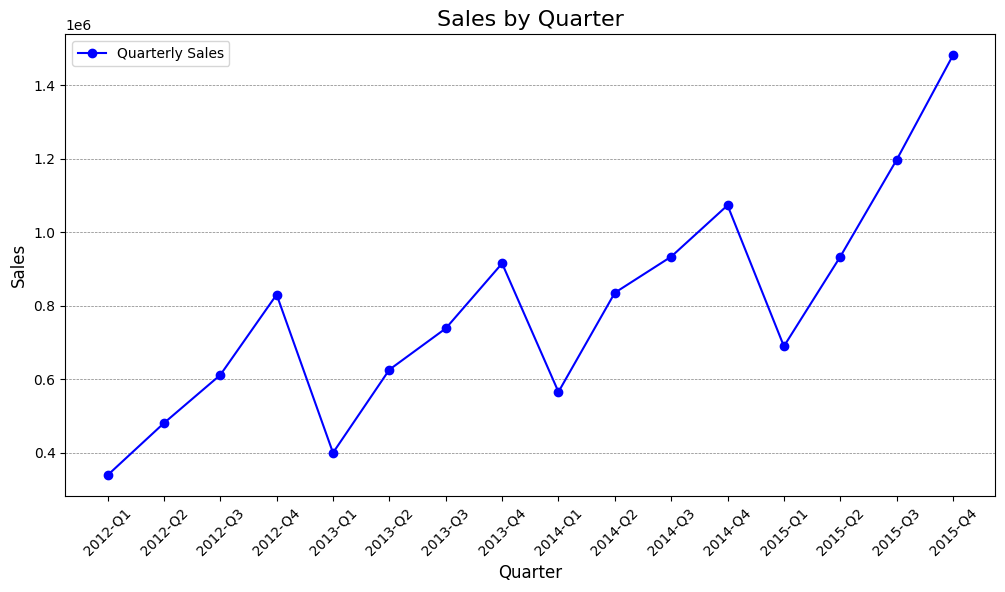

In [ ]:
# Plot the sales by quarter using quarterly_sales
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales['Order Date'], quarterly_sales['Sales'], marker='o', linestyle='-', color='b', label='Quarterly Sales')

# Formatting the plot
plt.title('Sales by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotates quarter labels for better readability
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)  # Subtle horizontal gridlines
plt.legend()  # Adds a legend to the plot for clarity

# Show the plot
plt.show()


In [ ]:
##Time Series using the Resample Methoc
monthly_sales_rs = df.resample('ME', on='Order Date')['Sales'].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2012-01,"98,898.50"
1,2012-02,"103,717.95"
2,2012-03,"135,746.46"
3,2012-04,"114,332.96"
4,2012-05,"158,228.30"


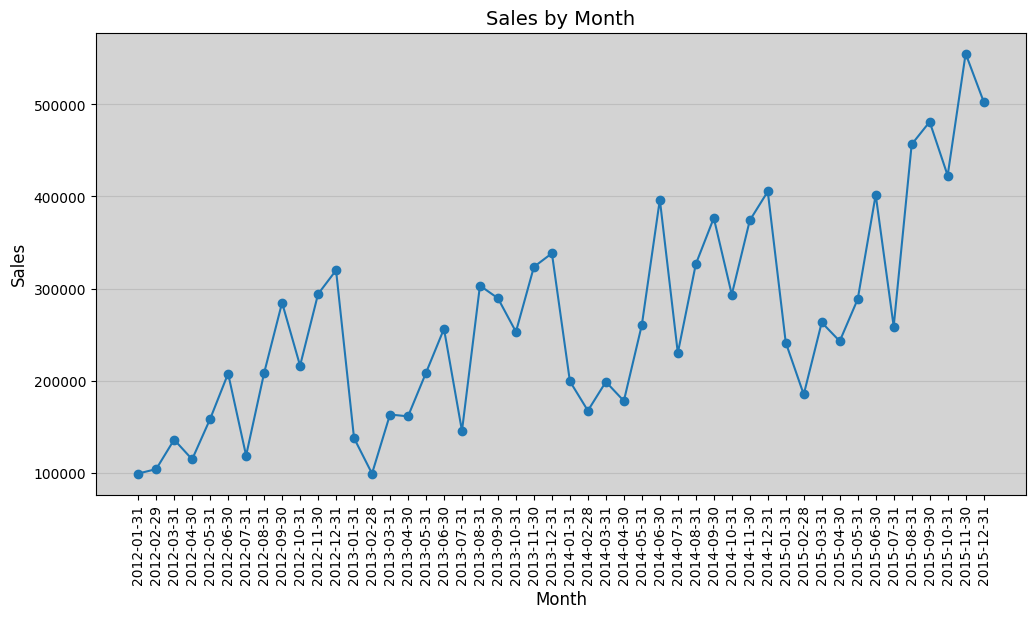

In [ ]:
#Convert to string for plotting
monthly_sales_rs['Order Date'] = monthly_sales_rs['Order Date'].astype(str)

#Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_rs['Order Date'], monthly_sales_rs['Sales'], marker='o', linestyle='-')

#Formatting the plot
plt.title('Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=90)

ax = plt.gca()  # Get the current Axes
ax.set_facecolor('lightgrey')  # Change plot (axes) background color
plt.grid(axis='y', linestyle='-', alpha=0.6)


#Show the plot
plt.show()

In [ ]:
Quarterly_sales_rs = df.resample('QE', on='Order Date')['Sales'].sum().reset_index()
Quarterly_sales_rs

,Order Date,Sales
0,2012-03-31,"338,362.91"
1,2012-06-30,"480,132.74"
2,2012-09-30,"611,085.80"
3,2012-12-31,"829,869.36"
4,2013-03-31,"399,367.71"
5,2013-06-30,"625,592.92"
6,2013-09-30,"737,768.87"
7,2013-12-31,"914,709.21"
8,2014-03-31,"565,019.71"
9,2014-06-30,"834,839.46"


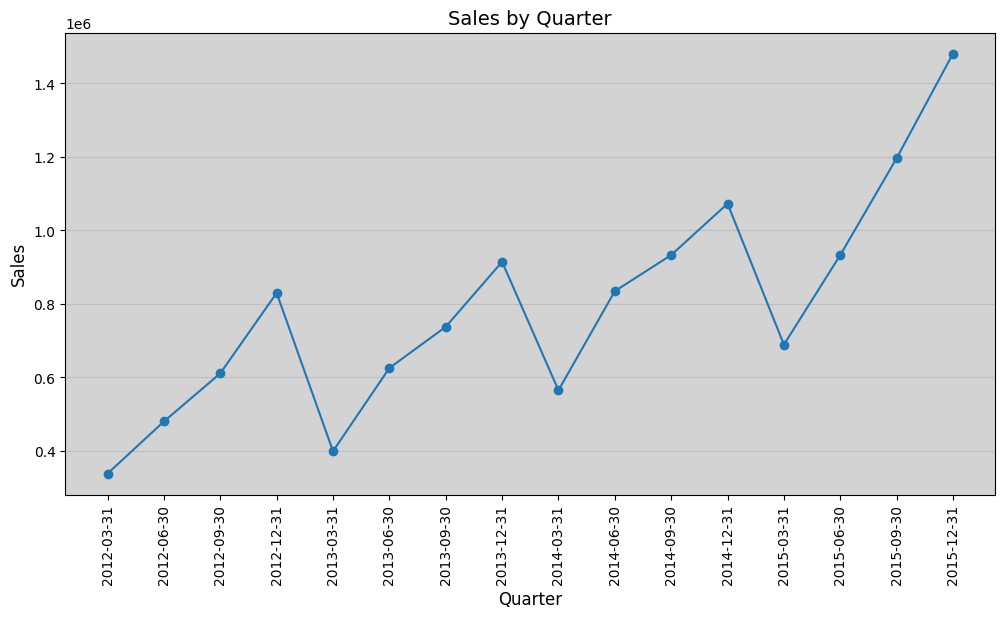

In [ ]:
#Convert to string for plotting
Quarterly_sales_rs['Order Date'] = Quarterly_sales_rs['Order Date'].astype(str)

#Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(Quarterly_sales_rs['Order Date'], Quarterly_sales_rs['Sales'], marker='o', linestyle='-')

#Formatting the plot
plt.title('Sales by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=90)

ax = plt.gca()  # Get the current Axes
ax.set_facecolor('lightgrey')  # Change plot (axes) background color
plt.grid(axis='y', linestyle='-', alpha=0.6)


#Show the plot
plt.show()

In [ ]:
#Monthend profit
monthly_profit_rs = df.resample('ME', on='Order Date')['Profit'].sum().reset_index()
monthly_profit_rs.head()

,Order Date,Profit
0,2012-01-31,"8,321.75"
1,2012-02-29,"14,323.08"
2,2012-03-31,"13,089.56"
3,2012-04-30,"13,211.08"
4,2012-05-31,"14,644.11"


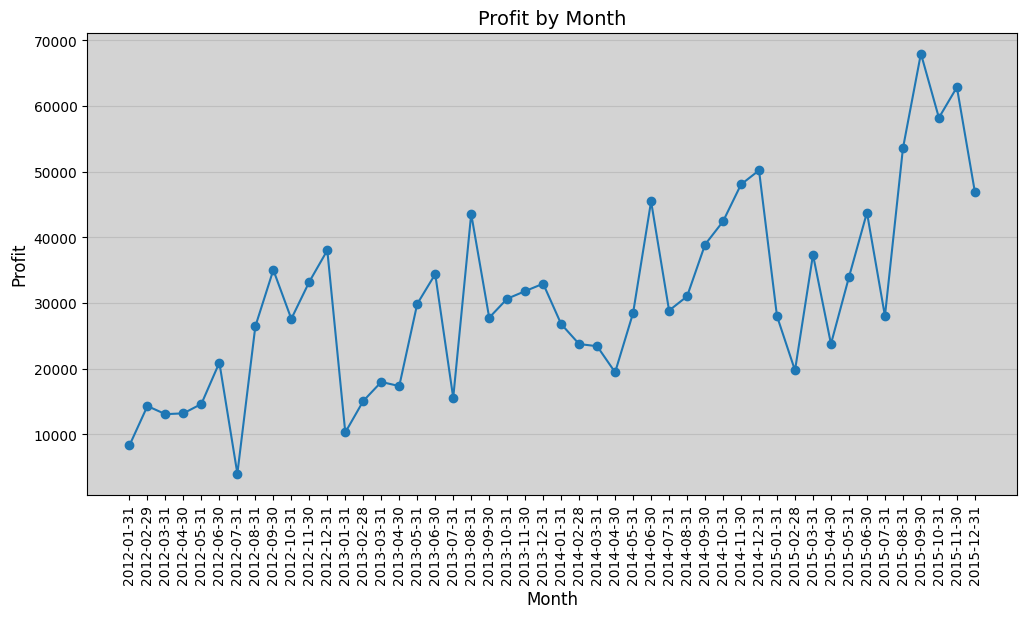

In [ ]:
#Convert to string for plotting
monthly_profit_rs['Order Date'] = monthly_profit_rs['Order Date'].astype(str)

#Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_rs['Order Date'], monthly_profit_rs['Profit'], marker='o', linestyle='-')

#Formatting the plot
plt.title('Profit by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=90)

ax = plt.gca()  # Get the current Axes
ax.set_facecolor('lightgrey')  # Change plot (axes) background color
plt.grid(axis='y', linestyle='-', alpha=0.6)


#Show the plot
plt.show()

In [ ]:
#Quarter-end Profit
Quarterly_profit_rs = df.resample('QE', on='Order Date')['Profit'].sum().reset_index()
Quarterly_profit_rs.head()

,Order Date,Profit
0,2012-03-31,"35,734.39"
1,2012-06-30,"48,795.71"
2,2012-09-30,"65,538.00"
3,2012-12-31,"98,872.29"
4,2013-03-31,"43,394.61"


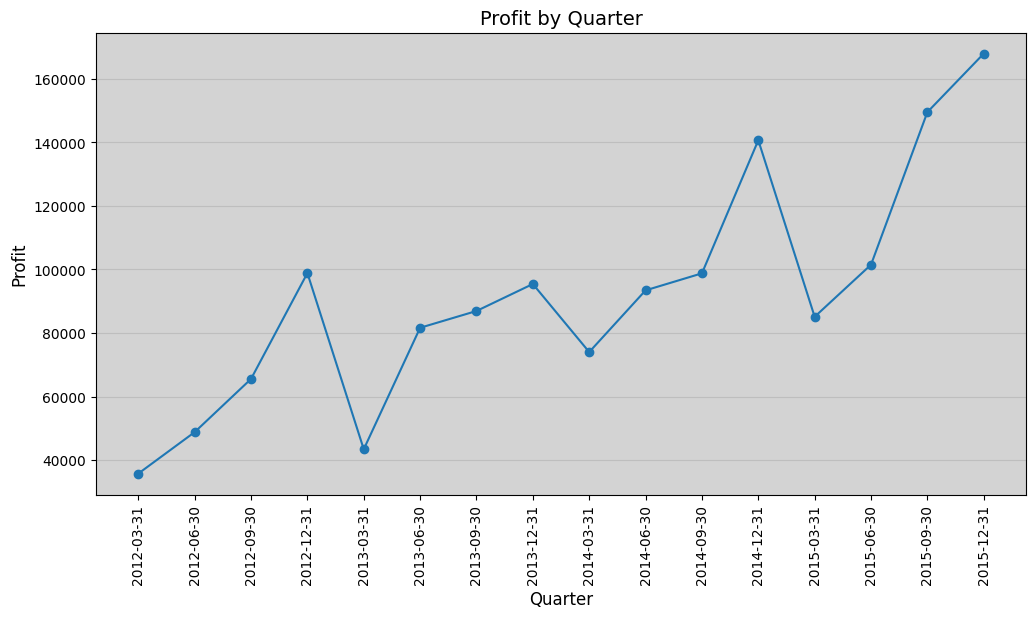

In [ ]:
#Convert to string for plotting
Quarterly_profit_rs['Order Date'] = Quarterly_profit_rs['Order Date'].astype(str)

#Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(Quarterly_profit_rs['Order Date'], Quarterly_profit_rs['Profit'], marker='o', linestyle='-')

#Formatting the plot
plt.title('Profit by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=90)

ax = plt.gca()  # Get the current Axes
ax.set_facecolor('lightgrey')  # Change plot (axes) background color
plt.grid(axis='y', linestyle='-', alpha=0.6)


#Show the plot
plt.show()

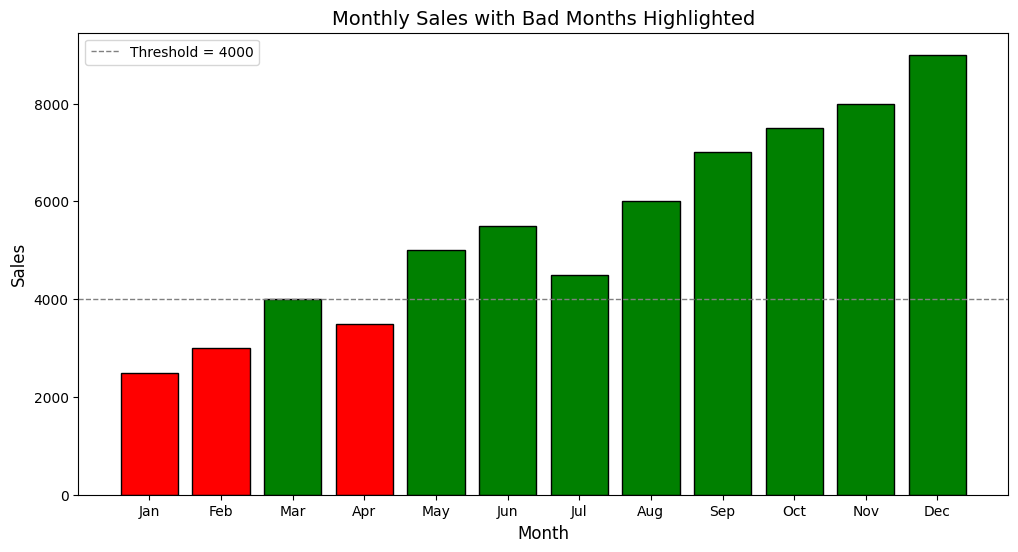

In [ ]:
#Showing low sales month

# Example Data
data = {'Order Date': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        'Sales': [2500, 3000, 4000, 3500, 5000, 5500, 4500, 6000, 7000, 7500, 8000, 9000]}

# Prepare the data
months = data['Order Date']  # X-axis labels
sales = data['Sales']        # Y-axis values

# Define threshold for "bad months"
threshold = 4000
colors = ['red' if sale < threshold else 'green' for sale in sales]  # Color bad months red, others green

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(months, sales, color=colors, edgecolor='black')

# Formatting the plot
plt.title('Monthly Sales with Bad Months Highlighted', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.axhline(threshold, color='gray', linestyle='--', linewidth=1, label=f'Threshold = {threshold}')  # Add threshold line
plt.legend()

# Show the plot
plt.show()

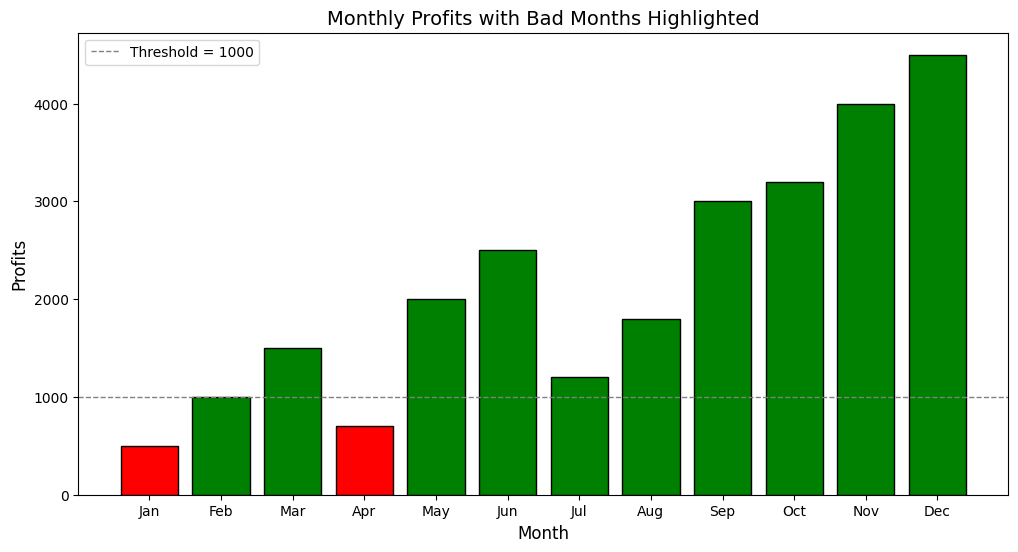

In [ ]:
#looking at the low profit months
import matplotlib.pyplot as plt

# Example Data
data = {'Order Date': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        'Profits': [500, 1000, 1500, 700, 2000, 2500, 1200, 1800, 3000, 3200, 4000, 4500]}

# Prepare the data
months = data['Order Date']  # X-axis labels
profits = data['Profits']    # Y-axis values

# Define threshold for "bad months"
threshold = 1000
colors = ['red' if profit < threshold else 'green' for profit in profits]  # Color bad months red, others green

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(months, profits, color=colors, edgecolor='black')

# Formatting the plot
plt.title('Monthly Profits with Bad Months Highlighted', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profits', fontsize=12)
plt.axhline(threshold, color='gray', linestyle='--', linewidth=1, label=f'Threshold = {threshold}')  # Add threshold line
plt.legend()

# Show the plot
plt.show()